In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
df = pd.read_pickle('../working/MCR2019_null_removed.pkl')
var_info = pd.read_pickle('../working/var_info.pkl')

#### 소득

In [87]:
# 소득이 '99'인 항목 확인
'소득'

,성별,연령,지역,직업,소득,최종학력,주거형태,결혼여부,자녀총수,평일인터넷,...,드라마_7,드라마_8,드라마_9,드라마_10,드라마_11,드라마_12,드라마_13,드라마_14,드라마_15,구매의향
871,2,61,1,5,99,4,1,1,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3203,1,69,7,7,99,3,2,3,99,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [88]:
# .loc을 이용해서 소득 '99'인 항목의 값을 '1'로 변경
'소득'

,성별,연령,지역,직업,소득,최종학력,주거형태,결혼여부,자녀총수,평일인터넷,...,드라마_7,드라마_8,드라마_9,드라마_10,드라마_11,드라마_12,드라마_13,드라마_14,드라마_15,구매의향


In [126]:
['소득', 'status'], 'scaling 처리 필요'

#### 최종학력

In [ ]:
code3 = pd.read_pickle('../code/code3.pkl')

In [ ]:
# 최종학력 컬럼만 df 형식으로 가져오기


In [ ]:
# code3에서 '최종학력' 관련 정보 가져오기


In [3]:
# 위의 두 df merge


In [5]:
# 최종학력의 분포 확인


,최종학력,항목명,항목코드,항목코드명,컬럼명
0,8,최종학력,8,중학교 재학,최종학력
1,8,최종학력,8,중학교 재학,최종학력
2,8,최종학력,8,중학교 재학,최종학력
3,8,최종학력,8,중학교 재학,최종학력
4,8,최종학력,8,중학교 재학,최종학력
...,...,...,...,...,...
3995,3,최종학력,3,중학교 졸업,최종학력
3996,4,최종학력,4,고등학교 졸업,최종학력
3997,3,최종학력,3,중학교 졸업,최종학력
3998,3,최종학력,3,중학교 졸업,최종학력


In [7]:
# 재학 항목을 졸업 사이에 넣기 위해 값 변경되는 mapping을 dict로 만듦
code_map = {8: 2.5, 9: 3.5, 10: 4.5, 11: 5.5, 12: 6.5}
# code_map = dict(zip(np.arange(8,13),np.arange(3,8)-0.5))

In [8]:
# 재학중 컬럼 생성, 0으로 우선 배정하고 '최종학력'이 8~12면 1을 할당 --> isin(code_map) 활용
df['재학중'] = 0


0        True
1        True
2        True
3        True
4        True
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Name: 최종학력, Length: 4000, dtype: bool

In [92]:
# code_map을 이용해서 재학중에 해당하는 값을 졸업보다 0.5 작은 값으로 변경하고 var_info 업데이트 --> replace(code_map)


In [93]:
## 최종학력별 count -->  앞의 코드와 동일





c:\program files\python38\lib\site-packages\pandas\core\reshape\merge.py:1113: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,최종학력,항목코드명,cnt
0,1.0,정규교육 없음,4
1,2.0,초등학교 졸업,36
2,2.5,null,135
3,3.0,중학교 졸업,191
4,3.5,null,176
5,4.0,고등학교 졸업,1309
6,4.5,null,14
7,5.0,전문대학 졸업,474
8,5.5,null,330
9,6.0,대학교 졸업,1227


In [127]:
['최종학력', 'status'], 'one-hot 또는 scaling 처리 필요'

#### 자녀총수

In [94]:
import pickle
choices = pickle.load(open('../code/choices.pkl', 'rb'))

In [12]:
# 자녀총수 분포 확인 --> 최종학력 코드 이용 + col 뱐수 도입 일반화





,자녀총수,항목코드명,cnt
0,1,1명,585
1,2,2명,1715
2,3,3명 이상,176
3,99,무응답,1524


In [16]:
# 자녀 총수가 '99'는 결혼여부와 어떤 관계가 있는지 확인


2    1380
1     120
3      24
Name: 결혼여부, dtype: int64

In [97]:
# '99'를 '0'으로 값 변경되는 mapping을 dict로 만듦
code_map = {99:0}

In [17]:
# code_map을 이용해서 99를 0으로 변경하고 var_info 업데이트
replace(code_map)

NameError: name 'replace' is not defined

In [99]:
# 변경 사항 확인 --> 앞의 코드 이용






,자녀총수,항목코드명,cnt
0,0,null,1524
1,1,1명,585
2,2,2명,1715
3,3,3명 이상,176


In [18]:
[col, 'status'],  'scaling 처리 필요'

SyntaxError: invalid syntax (<ipython-input-18-7de4b93aa334>, line 1)

#### 인터넷 사용 null값

In [ ]:
# 인터넷 사용에 대한 분석
# '인터넷' 또는 '모바일'이 들어 있는 컬럼들 정의
cols = 

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

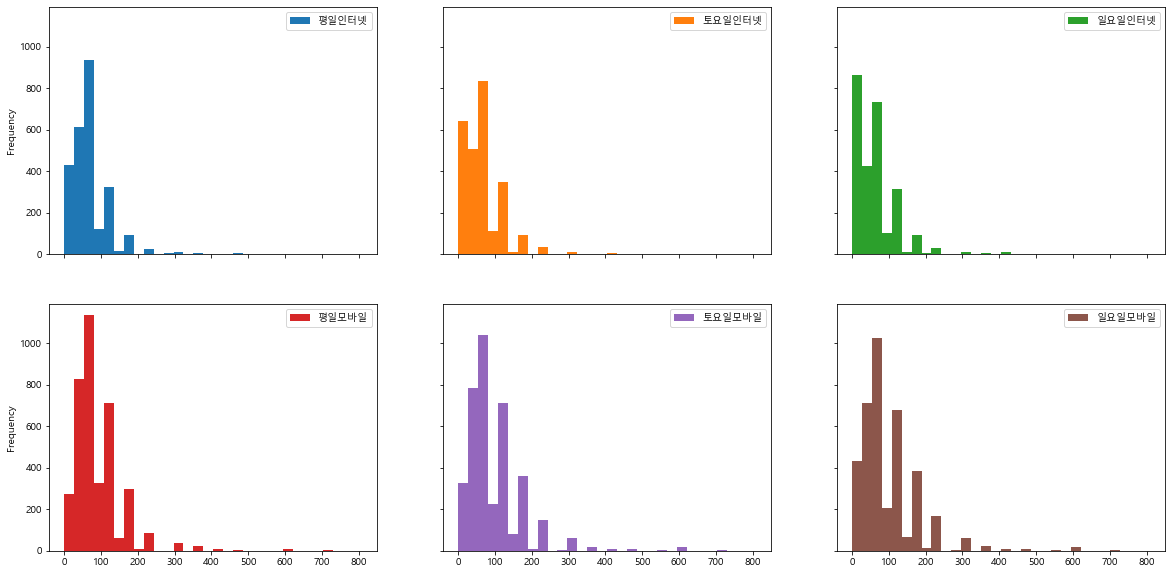

In [20]:
df[cols].plot.hist(subplots=True, layout=(2,3),                   
                   bins=30, figsize=(20,10),                   
                   sharex=True, sharey=True)

In [101]:
# 평일인터넷 분포 값으로 확인 : null값까지 같이 보려면
df['평일인터넷'].value_counts()

NaN      1397
60.0      923
30.0      539
120.0     325
0.0       187
20.0      140
90.0      115
180.0      91
10.0       79
40.0       68
240.0      25
15.0       19
150.0      14
80.0       12
300.0      11
360.0       8
50.0        6
480.0       5
100.0       4
270.0       3
330.0       3
210.0       3
420.0       3
5.0         3
70.0        2
25.0        2
600.0       2
540.0       1
160.0       1
1.0         1
85.0        1
390.0       1
465.0       1
35.0        1
140.0       1
280.0       1
720.0       1
24.0        1
Name: 평일인터넷, dtype: int64

- 자신이 속한 연령별 성별 중위값으로 대체

In [21]:
# '성별','연령'별 중위값 확인

df_median

평일인터넷  토요일인터넷  일요일인터넷  평일모바일  토요일모바일  일요일모바일
성별 연령                                              
1  13   60.0   120.0   120.0  120.0   120.0   120.0
   14   60.0    60.0    60.0   60.0   120.0   120.0
   15   60.0   120.0   120.0  120.0   120.0   120.0
   16   60.0    60.0    60.0   75.0   120.0   120.0
   17   60.0    60.0    60.0   90.0    90.0    90.0
...      ...     ...     ...    ...     ...     ...
2  65   30.0    30.0    20.0   30.0    30.0    30.0
   66   30.0    25.0    15.0   30.0    60.0    60.0
   67    NaN     NaN     NaN   30.0    30.0    30.0
   68   90.0    90.0    90.0   30.0    30.0    30.0
   69    NaN     NaN     NaN   25.0    30.0    25.0

[114 rows x 6 columns]

In [103]:
# 중위값으로 대체 - for 문을 이용한 방법 - 추천X
for idx, row in df.iterrows():
    if pd.isnull(row['평일인터넷']):
        sex, year = row[['성별','연령']]
        df.loc[idx, '평일인터넷']==df_median.loc[(sex,year),'평일인터넷']

- 한번에 처리

In [104]:
# 중위값으로 대체 - groupby transform을 이용해서 한번에 바꾸는 방법


# 그런데 null값을 mean 혹은 median으로 대체하는 것이 적절할까? 
# 아직도 null값이 존재하는데 어떻게 해야 하는가?    null은 왜 발생한 것일까?

c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\program files\python38\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


,평일인터넷,토요일인터넷,일요일인터넷,평일모바일,토요일모바일,일요일모바일
0,0.0,120.0,120.0,180.0,150.0,180.0
1,30.0,40.0,40.0,30.0,40.0,40.0
2,90.0,60.0,60.0,120.0,180.0,180.0
3,60.0,60.0,60.0,60.0,60.0,60.0
4,0.0,60.0,60.0,180.0,180.0,180.0
...,...,...,...,...,...,...
3995,60.0,60.0,60.0,60.0,60.0,60.0
3996,60.0,20.0,20.0,30.0,30.0,30.0
3997,60.0,60.0,30.0,30.0,30.0,30.0
3998,NaN,NaN,NaN,30.0,30.0,30.0


- null을 0으로 처리

In [22]:
# 모바일이 null값이 들어간 것과 다른 컬럼과의 관계 분석을 위한 임시 df 생성
df_temp = pd.read_pickle('../working/MCR2019_null_removed.pkl')

In [ ]:
# '인터넷'과 '모바일'이 포함된 컬럼
cols = 

In [23]:
# '인터넷'과 '모바일'이 포함된 컬럼들의 null을 0으로 변경
df_temp[cols] = df_temp[cols].fillna(0)
df[cols] = df_temp[cols]

In [ ]:
[cols, 'status'], 'scaling 처리 필요'

In [24]:
# 중간 결과 저장
var_info.to_pickle('../working/var_info_after_03.pkl')
df.to_pickle('../working/df_after_03.pkl')

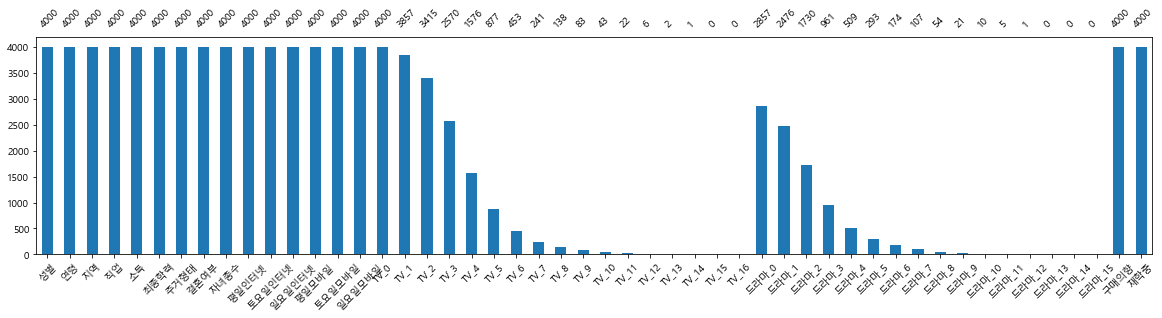

In [25]:
# 컬럼별 null개수 시각화
s_temp = df.notnull().sum()
s_temp.plot.bar(rot='45', figsize=(20,4))
max_val = s_temp.max()
for idx, item in enumerate(s_temp):
    plt.text(idx-0.4, max_val*1.1, item, rotation=45)

## 참고: 좀 더 고급진 ...

#### 소득, 최종학력, 자녀총수에서 변경해야 할 값들을 한번에 처리하기

In [109]:
# 각 컬럼명을 key로 하고 변경 mapping을 value로 하는 dict를 생성
{}
['소득'] = {99:1}
['최종학력'] = dict(zip(np.arange(8,13),np.arange(3,8)-0.5))
['자녀총수'] = {99:0}
code_map_all

{'소득': {99: 1},
 '최종학력': {8: 2.5, 9: 3.5, 10: 4.5, 11: 5.5, 12: 6.5},
 '자녀총수': {99: 0}}

In [110]:
# 변경전 데이터를 읽어 value_counts
df = pd.read_pickle('../working/MCR2019_null_removed.pkl')
for col in code_map_all:


1      46
2     118
3     398
4     600
5     772
6     969
7     487
8     278
9     189
10     51
11     90
99      2
Name: 소득, dtype: int64
1        4
2       36
3      191
4     1309
5      474
6     1227
7       78
8      135
9      176
10      14
11     330
12      26
Name: 최종학력, dtype: int64
1      585
2     1715
3      176
99    1524
Name: 자녀총수, dtype: int64


In [111]:
# 값 변경을 적용하고 value_counts
# df[col] 에 대해 replace를 이용해서 변경
for col in code_map_all:

for col in code_map_all:


1      48
2     118
3     398
4     600
5     772
6     969
7     487
8     278
9     189
10     51
11     90
Name: 소득, dtype: int64
1.0       4
2.0      36
2.5     135
3.0     191
3.5     176
4.0    1309
4.5      14
5.0     474
5.5     330
6.0    1227
6.5      26
7.0      78
Name: 최종학력, dtype: int64
0    1524
1     585
2    1715
3     176
Name: 자녀총수, dtype: int64


#### apply, agg, transform 비교

In [ ]:
# 모바일이 null값이 들어간 것과 다른 컬럼과의 관계 분석을 위한 임시 df 생성
df_temp = pd.read_pickle('../working/MCR2019_null_removed.pkl')

In [115]:
# group별로 계산된 값을 원할 때: apply --> 그룹별 평균값 계산
df_temp.groupby('직업')['평일인터넷']

직업
1    73.311404
2    74.015437
3    59.952607
4    51.080645
5    49.212544
6    72.076803
7    66.962963
Name: 평일인터넷, dtype: float64

In [116]:
# group별로 한번에 여러 계산된 값을 원할 때: agg --> 그룹별 'mean', 'min', 'max' 계산
df_temp.groupby('직업')['평일인터넷']

,mean,min,max
직업,,,
1,73.311404,0.0,390.0
2,74.015437,0.0,600.0
3,59.952607,0.0,480.0
4,51.080645,0.0,480.0
5,49.212544,0.0,480.0
6,72.076803,0.0,720.0
7,66.962963,0.0,300.0


In [117]:
# 그룹별 '평일인터넷'에 대해서는 ['mean', 'min', 'max'], '성별'에 대해서는 'count' 계산
df_temp.groupby('직업')

평일인터넷                성별
         mean  min    max count
직업                             
1   73.311404  0.0  390.0   280
2   74.015437  0.0  600.0   675
3   59.952607  0.0  480.0   746
4   51.080645  0.0  480.0   661
5   49.212544  0.0  480.0   655
6   72.076803  0.0  720.0   752
7   66.962963  0.0  300.0   231

In [118]:
# group별로 계산된 결과 각각의 항목 값으로 만들 때: transform
df_temp.groupby('직업')[['평일인터넷','평일모바일']].transform(lambda x: x)

,평일인터넷,평일모바일
0,0.0,180.0
1,30.0,30.0
2,90.0,120.0
3,NaN,60.0
4,0.0,180.0
...,...,...
3995,NaN,60.0
3996,NaN,30.0
3997,NaN,30.0
3998,NaN,30.0


In [119]:
# 자신이 속한 직업별로'평일인터넷','평일모바일'을 자신의 위치에 반환
df_temp.groupby('직업')[['평일인터넷','평일모바일']]

,평일인터넷,평일모바일
0,72.076803,119.866577
1,72.076803,119.866577
2,72.076803,119.866577
3,72.076803,119.866577
4,72.076803,119.866577
...,...,...
3995,51.080645,67.066451
3996,49.212544,71.013180
3997,51.080645,67.066451
3998,51.080645,67.066451


In [120]:
# 자신이 null 일 때 자신이 속한 직업별로'평일인터넷','평일모바일'의 평균값으로 대체하고 아니면 자기 원래 값
df_temp.groupby('직업')[['평일인터넷','평일모바일']]

,평일인터넷,평일모바일
0,0.000000,180.0
1,30.000000,30.0
2,90.000000,120.0
3,72.076803,60.0
4,0.000000,180.0
...,...,...
3995,51.080645,60.0
3996,49.212544,30.0
3997,51.080645,30.0
3998,51.080645,30.0


#### 인터넷, 모바일 관련 null값이 발생한 원인 추정

In [114]:
# '평일모바일'이 null인지 여부로 새로운 컬럼 생성 (assign 활용)

df_temp['모바일_null'].value_counts()

False    3814
True      186
Name: 모바일_null, dtype: int64

In [27]:
# 특정 컬럼과 '모바일_null'과의 cross-tab
col = '연령'
df_temp.groupby(col)

In [26]:
# 각 컬럼과 '모바일_null'의 cross-tab을 만들어 chi square p-value 계산
from scipy.stats import chi2_contingency
chi2_result = {}
for col in df_temp.columns[:9]:
    try:
        chi2_result[col] = (chi2_contingency(
            
            
            
            
                                             )[:3])      # expected value는 제외
    except:
        pass
pd.DataFrame(chi2_result, index=['chi2','p','dof']).T.sort_values('p')
# 연령, 최종학력, 소득이 null값 발생한 정도에 영향이 가장 큼

,chi2,p,dof


<AxesSubplot:xlabel='연령'>

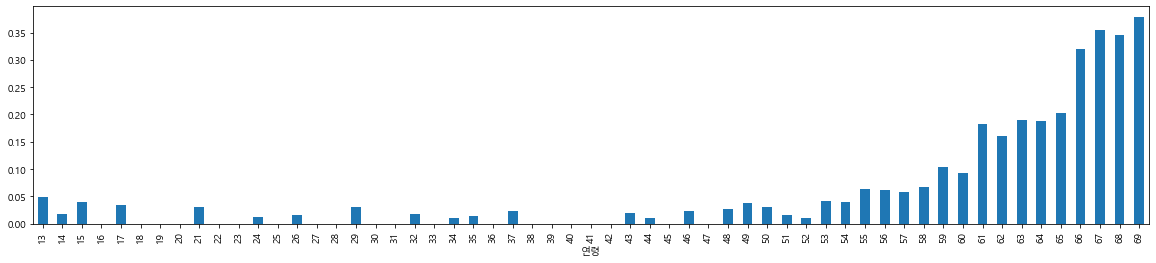

In [122]:
# 연령별 '평일모바일' null값의 관계 시각화
# 연령이 높을수록 null값이 급격히 높아짐
col = '연령'
df_agg = df_temp.groupby(col).agg({col:'size','평일모바일':lambda x: x.isnull().sum()})
(df_agg['평일모바일'] / df_agg[col]).plot.bar(figsize=(20,4))

<AxesSubplot:xlabel='최종학력'>

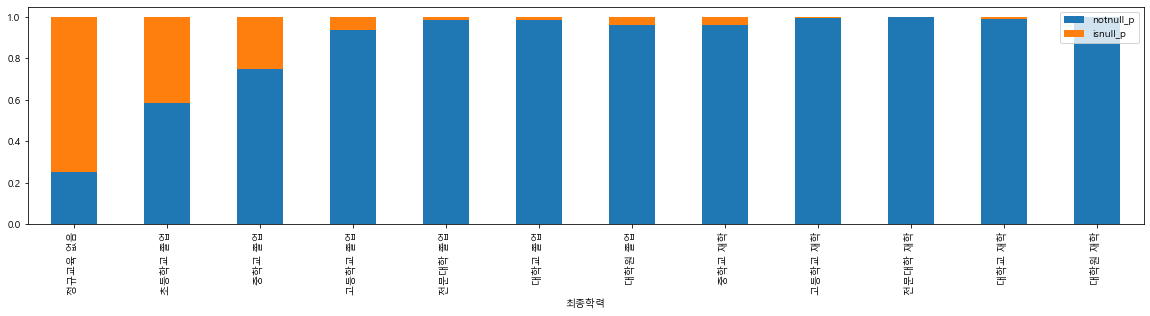

In [124]:
# 최종학력별 '평일모바일' null값의 관계 시각화
# 학력이 높을수록 null값이 적음, 재학중에 null값이 적음
col = '최종학력'
df_agg = df_temp.groupby(col).agg({'평일모바일':[lambda x: x.notnull().sum(), 
                                                 lambda x: x.isnull().sum(), 
                                                 'size']})
df_agg.columns = ['notnull', 'isnull', 'size']
df_agg['notnull_p'] = df_agg['notnull'] / df_agg['size']
df_agg['isnull_p'] = df_agg['isnull'] / df_agg['size']
df_agg[['notnull_p', 'isnull_p']].rename(index=choices[col]).plot.bar(stacked=True, figsize=(20,4))

# Null값은 사용하지 않음을 의미하는 것으로 추론될 수 있음

In [134]:
# var_info 업데이트
var_info.to_pickle('../working/var_info_after_03.pkl')
var_info

,dtypes,nunique,notnull,isnull,var,vtype,remarks,status
성별,int64,2,4000,0,input,nominal,one-hot,NaN
연령,int64,57,4000,0,input,ordinal,scaling 필요,NaN
지역,int64,7,4000,0,input,nominal,one-hot,NaN
직업,int64,7,4000,0,input,nominal,one-hot,NaN
소득,int64,12,4000,0,input,ordinal,99(모름/무응답) --> 1(99만원 미만) 변경 필요 + scaling 필요,scaling 처리 필요
최종학력,int64,12,4000,0,input,nominal,"재학 --> 졸업 순으로 변경, 학생 컬럼 추가: 재학인 경우 + scaling ...",scaling 처리 필요
주거형태,int64,5,4000,0,input,nominal,one-hot,NaN
결혼여부,int64,3,4000,0,input,nominal,one-hot,NaN
자녀총수,int64,4,4000,0,input,ordinal,자녀 총수 99(무응답) --> 0 변경 필요 + scaling 필요,scaling 처리 필요
평일인터넷,float64,37,2603,1397,input,number,null 처리 + scaling 필요,scaling 처리 필요
